## Marciniak, Duncan, and Hu (2002): _Mechanics of Sheet Metal Forming_.
### Exercise 3.1.

A small circle (5.0 mm in diameter) is printed on the surface of an undeformed
low carbon steel sheet with thickness 0.8 mm. Then the sheet is deformed in a plane stress
proportional process. It is noted after unloading that the circle has been distorted into an
ellipse with major and minor diameters of 6.1 mm and 4.8 mm respectively. The effective
stress-strain relationship is:
$$
\overline\sigma = 600 \overline\varepsilon^{0.22} \text{ MPa}
$$

1. Assuming that the loading is monotonic, what is the ratio of stresses $\alpha$?
2. Determine the tension $T_1$ and $T_2$.
3. Calculate the effective strain.

### Solutions

The stress ratio is found from:
$$
\alpha=\frac{2\beta+1}{2+\beta}
$$
where $\beta = \varepsilon_2/\varepsilon_1$ and 
$$
\varepsilon_1 = \ln\frac{d_1}{d_0} \qquad \varepsilon_2 = \ln\frac{d_2}{d_0}
$$

The tension values are found from:
$$
T_1 = \sigma_1\,t \qquad T_2 = \sigma_2\,t = \alpha\,T_1
$$
where the major stress is found from:
$$
\overline\sigma = \sigma_1\sqrt{1-\alpha+\alpha^2} \qquad\rightarrow\qquad 
\sigma_1 = \frac{\overline\sigma}{\sqrt{1-\alpha+\alpha^2}}
$$
the sheet thickness from:
$$
\varepsilon_3 = \ln\frac{t}{t_0} = -(1+\beta)\varepsilon_1 \qquad\rightarrow\qquad
t = t_0 \exp{(\varepsilon_3)}
$$
and the effective stress from:
$$
\overline\varepsilon = \frac{2}{\sqrt{3}}\varepsilon_1 \sqrt{1+\beta+\beta^2} \qquad\rightarrow\qquad
\overline\sigma = K\,\overline\varepsilon^n
$$

Run the cells below to solve the exercise:

In [1]:
d0 = 5
t0 = 0.8
d1 = 6.1
d2 = 4.8
K = 600
n = 0.22

import math
e1 = math.log(d1/d0)
e2 = math.log(d2/d0)
print('e1 = %0.3f, e2 = %0.3f' % (e1, e2))

beta = e2/e1
alpha = (2*beta+1)/(2+beta)
print('beta = %0.3f --> alpha = %0.3f' % (beta, alpha))

e1 = 0.199, e2 = -0.041
beta = -0.205 --> alpha = 0.328


In [2]:
eeff = 2/math.sqrt(3)*e1*math.sqrt(1+beta+beta**2)
seff = K*eeff**n
print('eeff = %0.3f, seff = %0.1f MPa' % (eeff, seff))

s1 = seff/math.sqrt(1-alpha+alpha**2)
print('s1 = %0.1f MPa' % (s1))

e3 = -(1+beta)*e1
t = t0*math.exp(e3)
print('e3 = %0.3f, t = %0.1f mm' % (e3, t))

T1 = s1*t
T2 = alpha*T1
print('T1 = %0.1f kN/m, T2 = %0.1f kN/m' % (T1, T2))

eeff = 0.210, seff = 425.7 MPa
s1 = 482.1 MPa
e3 = -0.158, t = 0.7 mm
T1 = 329.3 kN/m, T2 = 108.2 kN/m


### Stress-strain curve

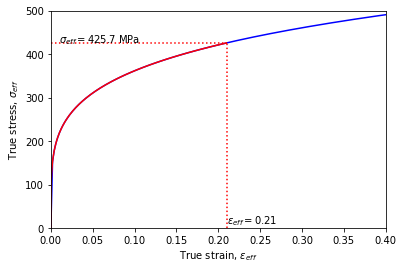

In [3]:
import marciniak_functions as f
f.plot_Hollomon(K, n, eeff, seff)

### Stress path

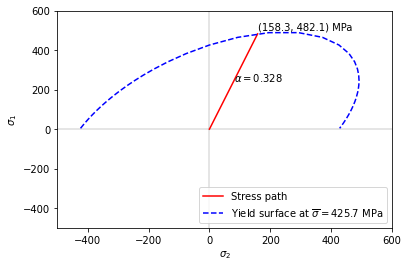

In [4]:
f.plot_stresses(s1, alpha*s1)

### Strain path

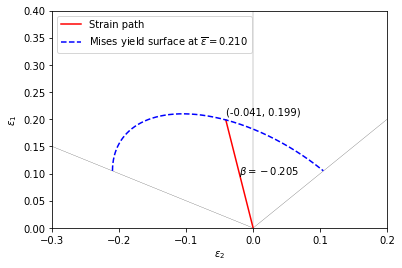

In [5]:
f.plot_strains(e1, beta*e1)